<a href="https://colab.research.google.com/github/rpangarego/iris-flower-analysis-prediction/blob/main/Iris_Flowers_Dataset_Analysis_%26_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

iris = load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(columns=iris.feature_names, data=iris.data)
df['target'] = iris.target
df['names'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
# data rows and cols
df.shape

(150, 6)

In [6]:
# check for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
names                0
dtype: int64

<Axes: >

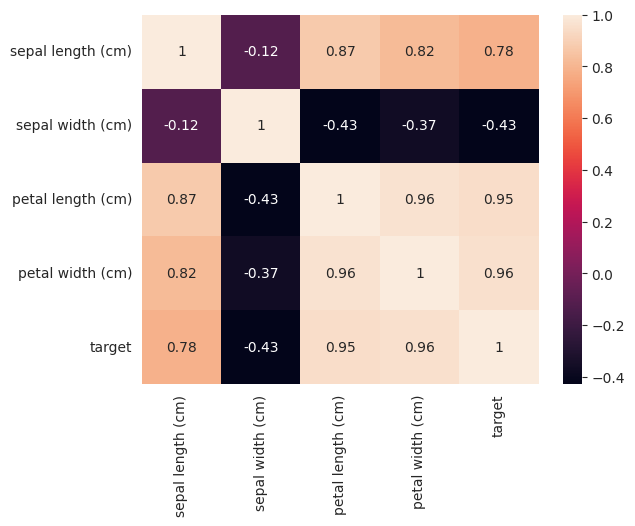

In [7]:
# features correlation
corr = df.corr()
sns.heatmap(corr, annot=True)

In [8]:
df.iloc[:,0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

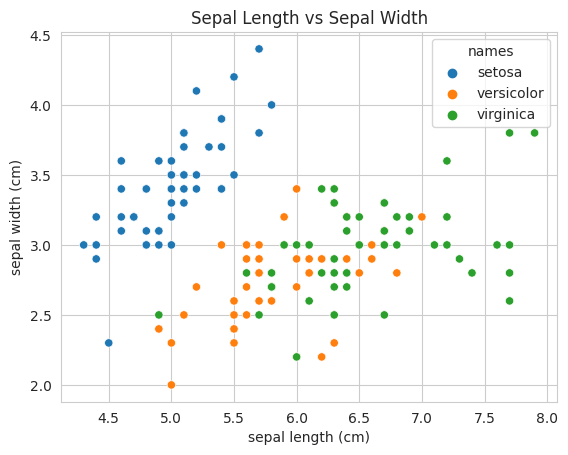

In [9]:
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['names'])
plt.title('Sepal Length vs Sepal Width')
plt.show()

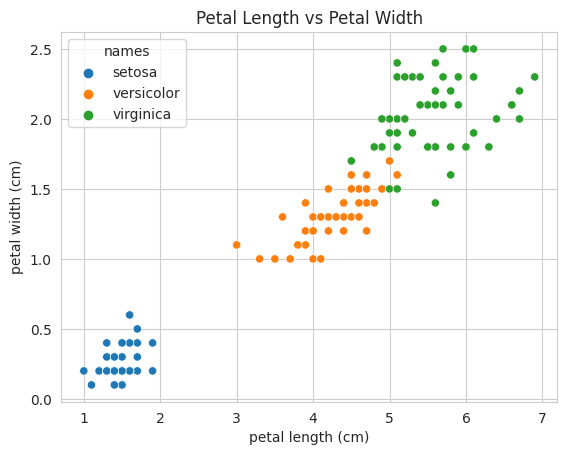

In [10]:
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['names'])
plt.title('Petal Length vs Petal Width')
plt.show()

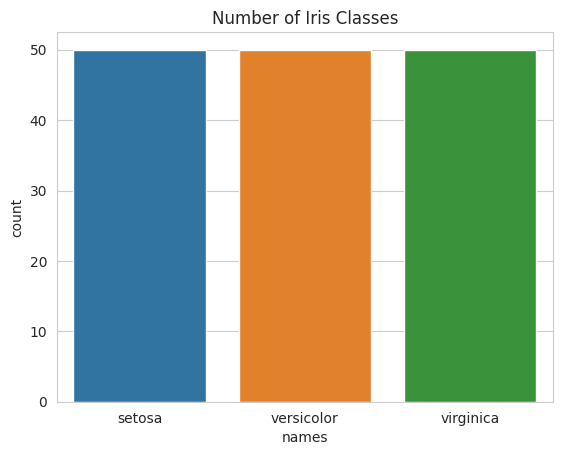

In [11]:
sns.countplot(x=df['names'])
plt.title('Number of Iris Classes')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
X = df.drop({'target','names'}, axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
print("X train:", X_train.shape)
print("y train:", y_train.shape)
print("X test:", X_test.shape)
print("y test:", y_test.shape)

X train: (105, 4)
y train: (105,)
X test: (45, 4)
y test: (45,)


In [16]:
summary = []
def model_metrics(model_name, test, pred):
  result = {}
  result['model'] = model_name
  result['mse'] = mean_squared_error(test, pred)
  result['mae'] = mean_absolute_error(test, pred)
  result['rmse'] = np.sqrt(mean_squared_error(test, pred))
  result['accuracy score'] = accuracy_score(test, pred)
  summary.append(result)
  print(result)
  print('\nConfusion Matrix:\n',confusion_matrix(test, pred))

  # plot the model
  # sns.scatterplot(x=test, y=pred, hue=pred)
  # plt.title("y_test vs y_pred")
  # plt.show()


In [17]:
# Linear Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Evaluate model
model_metrics('LogReg', y_test, y_pred)


{'model': 'LogReg', 'mse': 0.0, 'mae': 0.0, 'rmse': 0.0, 'accuracy score': 1.0}

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [18]:
# Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate model
model_metrics('Decision Tree', y_test, y_pred)

{'model': 'Decision Tree', 'mse': 0.0, 'mae': 0.0, 'rmse': 0.0, 'accuracy score': 1.0}

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [19]:
# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate model
model_metrics('Random Forest', y_test, y_pred)

{'model': 'Random Forest', 'mse': 0.0, 'mae': 0.0, 'rmse': 0.0, 'accuracy score': 1.0}

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [20]:
# KNN Classifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate model
model_metrics('KNN', y_test, y_pred)

{'model': 'KNN', 'mse': 0.0, 'mae': 0.0, 'rmse': 0.0, 'accuracy score': 1.0}

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [21]:
# SVC
model = SVC(max_iter=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate model
model_metrics('SVC', y_test, y_pred)

{'model': 'SVC', 'mse': 0.0, 'mae': 0.0, 'rmse': 0.0, 'accuracy score': 1.0}

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [22]:
# Model Summary
summary_df = pd.DataFrame(summary)
summary_df

,model,mse,mae,rmse,accuracy score
0,LogReg,0.0,0.0,0.0,1.0
1,Decision Tree,0.0,0.0,0.0,1.0
2,Random Forest,0.0,0.0,0.0,1.0
3,KNN,0.0,0.0,0.0,1.0
4,SVC,0.0,0.0,0.0,1.0


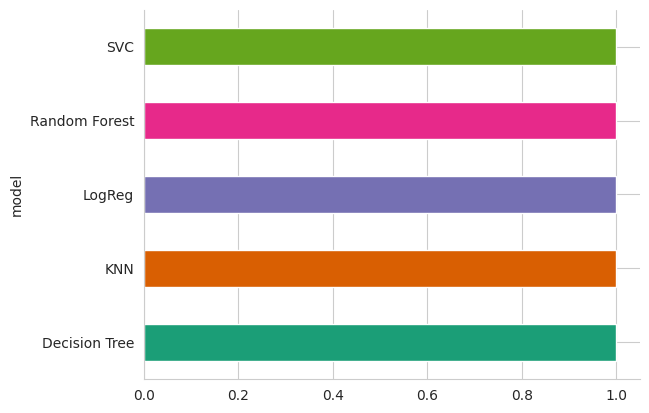

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
summary_df.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
# testing prediction by random values
# expected results: 2 (virginica), 0 (setosa), 1 (versicolor)
model.predict([[5.7, 3, 5, 1.8],[5, 3.5, 1.5, 0.25],[6, 3, 4, 1.5]])

array([2, 0, 1])